In [29]:
import pandas as pd
import numpy as np
import scipy
from sklearn.decomposition import TruncatedSVD

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import altair as alt

In [30]:
# from sklearn.preprocessing import OrdinalEncoder

In [31]:
alt.data_transformers.disable_max_rows()
# alt.renderers.enable('default')
# alt.data_transformers.enable('json')

DataTransformerRegistry.enable('default')

In [32]:
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [4]:
# from scipy.sparse import csr_matrix

In [5]:
# def read_data(file_path):
#     from scipy.sparse import csr_matrix
    
#     # Read pickle
#     stu = pd.read_pickle(file_path)
    
#     # Num of dictionaries in the file
#     n = len(stu)
    
#     # Initialize df
#     df = pd.DataFrame()
    
#     # Loop through dicts and concat
#     for i in range(n):
#         stu[i]['student_id'] = i
#         df = pd.concat([df, stu[i]])
    
#     return df

In [6]:
# stu = pd.read_pickle('User profiles/student_profiles.pickle')

In [7]:
# # Num of dictionaries in the file
# n = len(stu)

# # Initialize df
# df = pd.DataFrame()

# courses_taken = []
# student_ids = []

# # Loop through dicts and concat
# for i in range(n):
#     student_id = i
#     course_list = stu[i]['Subject/Catalog'].tolist()
    
#     student_ids.append(student_id)
#     courses_taken.append(course_list)
    
# df = pd.DataFrame({'Student_id': student_ids, 'Courses_taken': courses_taken})

In [8]:
# df

In [9]:
# df = read_data('User profiles/student_profiles.pickle')

In [10]:
# df.reset_index(inplace=True)
# df.drop(columns=['index'], inplace=True)
# df.fillna(' ', inplace=True)

In [11]:
# df.to_csv('User profiles/student_profiles_all.csv', index=False)

In [33]:
df = pd.read_csv('User profiles/student_profiles_all.csv')

In [13]:
# def preprocess_data(df):
#     '''
#     input: 
#         df = dataframe
#         target = column of dataframe containing target values
        
#     output: (dataframe standardized onto unit scale, dataframe with labels)
#     '''
    
#     df.reset_index(inplace=True)
#     df.drop(columns=['index'], inplace=True)
    
#     # remove numerical label from data
#     numerical_cols = ['Credits', 'Rating', 'student_id']
#     df_tempt = df.copy()
#     df_tempt.drop(columns=df[numerical_cols], inplace=True)
    
#     # encode cat columns to numerical
#     enc = OrdinalEncoder()
#     x = enc.fit_transform(df_tempt)
#     encoded_df = pd.DataFrame(x, columns=df_tempt.columns)
    
#     # add numerical cols back to df
#     encoded_df[numerical_cols] = df[numerical_cols]
    
#     return encoded_df

In [14]:
# encoded_df = preprocess_data(df)

In [15]:
# new_df = pd.pivot_table(df, values = 'Rating', index = 'student_id', columns = 'Subject/Catalog').fillna(0)

In [16]:
# data = csr_matrix(new_df)
# svd = TruncatedSVD(random_state = 42, n_components=100)

In [17]:
# df_transformed = svd.fit_transform(data)

In [18]:
# from sklearn.cluster import DBSCAN
# from matplotlib import pyplot
# from numpy import unique
# from collections import Counter
# import hdbscan

In [19]:
# from sklearn.metrics.pairwise import pairwise_distances

In [20]:
# metric_list = ['jaccard', 'kulsinski',
#   'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
#   'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'cityblock', 'cosine', 'euclidean', 'l1', 'l2',
#   'manhattan']

In [21]:
# def cluster(min_cluster_size=10, min_samples=4):
#     distance_matrix = pairwise_distances(new_df, metric='hamming')

#     hdbscan_args = {'min_cluster_size': min_cluster_size,
#                 'metric': 'precomputed',
#                 'cluster_selection_method': 'leaf',
#                 'min_samples': min_samples}

#     clustering = hdbscan.HDBSCAN(**hdbscan_args).fit(distance_matrix)

#     cluster_list = clustering.labels_.tolist()
    
#     return Counter(cluster_list)

In [22]:
# for i in np.random.randint(30, 80, 5).tolist():
#     for j in np.random.randint(3, 10, 5).tolist():
#         print(f'Min cluster size = {i}')
#         print(f'Min samples = {j}')
#         print(cluster(min_cluster_size=i, min_samples=j))
#         print('-------------------')

In [23]:
# for metric in metric_list:
#     try:
#         print(f'Metric is {metric}:')
#         print(cluster(metric))
#         print('------------------')
#     except:
#         pass

In [24]:
# distance_matrix = pairwise_distances(new_df, metric='hamming')

In [25]:
# hdbscan_args = {'min_cluster_size': 60,
#                 'metric': 'precomputed',
#                 'cluster_selection_method': 'leaf',
#                 'min_samples': 15}

In [26]:
# clustering = hdbscan.HDBSCAN(**hdbscan_args).fit(distance_matrix)

In [27]:
# hdbscan.dist_metrics.METRIC_MAPPING

In [28]:
# # tsne = TSNE(n_components=2, metric='euclidean')

# model = tsne.fit_transform(new_df)

# tsne_df = pd.DataFrame(data = model, columns = ['Dim #' + str(x+1) for x in range(2)])

# tsne_df['clusters'] = clustering.labels_

In [29]:
# tsne_df.to_csv('User profiles/student_profiles_chart_df.csv', index=False)

In [15]:
tsne_df = pd.read_csv('User profiles/student_profiles_chart_df.csv')

In [24]:
selection = alt.selection_single(fields=['clusters'], on='click', bind='legend')

In [25]:
color = alt.condition(selection,
                      alt.Color('clusters:N', title='Cluster'),
                      alt.value('lightgray'))

In [26]:
chart = alt.Chart(tsne_df).mark_circle(opacity=0.45, size=55).encode(
            x=alt.X('Dim #1'),
            y=alt.Y('Dim #2'),
            color=color

).properties(width=900, height=600, title='Student User Profile Clusters'
             
).configure_axis(domain=False, labelPadding=5, title=None, ticks=False, labels=False

).add_selection(
        selection
)

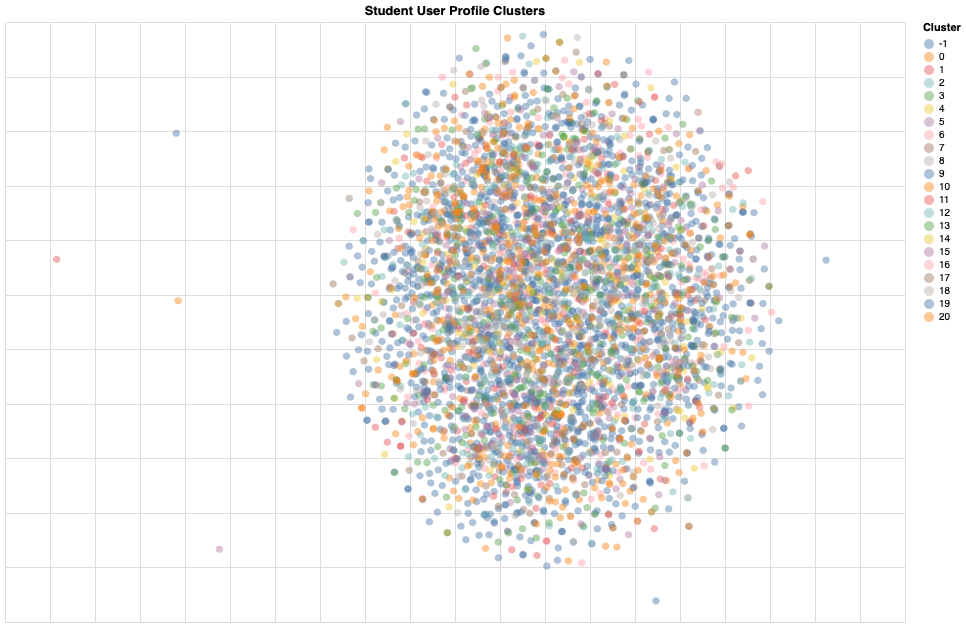

In [27]:
chart

In [28]:
chart.save('User profiles/student_profiles_chart.html')

In [40]:
df.groupby(['student_id', 'Course Title'])['Rating'].mean().reset_index()

,student_id,Course Title,Rating
0,0,Adv Prog Lang,2.329611
1,0,Business German,4.359243
2,0,Calculus II,3.503458
3,0,Data Struct&Algor,3.961472
4,0,Discrete Math,4.660652
...,...,...,...
159499,4999,Robot Kinemat Dynam,4.357204
159500,4999,Soft Engr Tools,4.578366
159501,4999,Software for Access,2.244969
159502,4999,The Novella,3.922518


In [41]:
df.groupby(['Course Title', 'student_id'])['Rating'].mean().reset_index()

,Course Title,student_id,Rating
0,,176,2.393882
1,,334,4.390129
2,,349,2.297008
3,,487,4.281497
4,,490,2.438126
...,...,...,...
159499,"Zen: History, Culture, and Critique",4297,2.712273
159500,"Zen: History, Culture, and Critique",4459,3.788302
159501,"Zen: History, Culture, and Critique",4495,3.468164
159502,"Zen: History, Culture, and Critique",4682,4.706311
